<a href="https://colab.research.google.com/github/rakesh4334/ChandraRakesh.github.io/blob/main/Face_Recognition_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=32f15ac1710404bce11e2ee6ef81d0bbd015721ea2304c9691253a17343a10d3
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget 'https://upload.wikimedia.org/wikipedia/commons/8/85/Elon_Musk_Royal_Society_%28crop1%29.jpg' -O known/elon.jpg


!mkdir unknown

--2021-11-30 11:44:30--  https://upload.wikimedia.org/wikipedia/commons/8/85/Elon_Musk_Royal_Society_%28crop1%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171941 (168K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 167.91K  --.-KB/s    in 0.05s   

2021-11-30 11:44:30 (3.07 MB/s) - ‘known/elon.jpg’ saved [171941/171941]



In [ ]:
!wget 'https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5c76b7d331358e35dd2773a9%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D0%26cropX2%3D4401%26cropY1%3D0%26cropY2%3D4401' -O known/mark.jpg


--2021-11-30 11:46:02--  https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5c76b7d331358e35dd2773a9%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D0%26cropX2%3D4401%26cropY1%3D0%26cropY2%3D4401
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19913 (19K) [image/jpeg]
Saving to: ‘known/mark.jpg’

known/mark.jpg      100%[===================>]  19.45K  --.-KB/s    in 0.001s  

2021-11-30 11:46:02 (23.2 MB/s) - ‘known/mark.jpg’ saved [19913/19913]



In [ ]:
!wget 'https://cdn.britannica.com/45/223045-050-A6453D5D/Telsa-CEO-Elon-Musk-2014.jpg' -O unknown/1.jpg

--2021-11-30 11:47:08--  https://cdn.britannica.com/45/223045-050-A6453D5D/Telsa-CEO-Elon-Musk-2014.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 99.84.160.117, 99.84.160.83, 99.84.160.77, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|99.84.160.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288950 (282K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>] 282.18K  --.-KB/s    in 0.03s   

2021-11-30 11:47:08 (8.56 MB/s) - ‘unknown/1.jpg’ saved [288950/288950]



In [ ]:
!wget 'https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f4ebe0c87612dab4f12a597%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D292%26cropX2%3D3684%26cropY1%3D592%26cropY2%3D3987' -O unknown/2.jpg

--2021-11-30 11:49:15--  https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f4ebe0c87612dab4f12a597%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D292%26cropX2%3D3684%26cropY1%3D592%26cropY2%3D3987
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21642 (21K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>]  21.13K  --.-KB/s    in 0.001s  

2021-11-30 11:49:15 (14.5 MB/s) - ‘unknown/2.jpg’ saved [21642/21642]



In [ ]:
import face_recognition

In [ ]:
known_encodings = []
known_names = []
known_dir = 'known'

In [ ]:
import cv2
def resize(path):
  image = cv2.imread(path)
  (h,w) = image.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  img = cv2.resize(image, (width,height))
  return img

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
for file in os.listdir(known_dir):
  image = resize(known_dir+'/'+file)
  img_enc = face_recognition.face_encodings(image)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])


In [ ]:
image = resize('unknown/1.jpg')
unknown_enc = face_recognition.face_encodings(image)[0]

result = face_recognition.compare_faces(known_encodings,unknown_enc)
print(result)

[True, False]


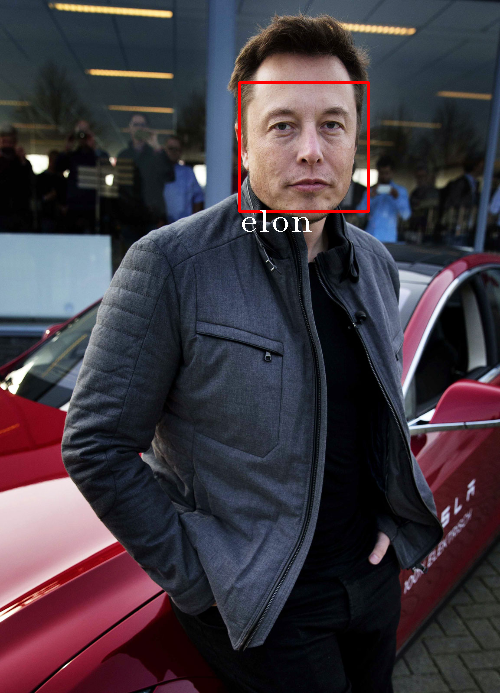

In [ ]:
for i in range(len(result)):
  if result[i]:
    name = known_names[i]

    (top,right,bottom,left) = face_recognition.face_locations(image)[0]
    cv2.rectangle(image,(left,top),(right,bottom), (0,0,255), 2)
    cv2.putText(image,name,(left,bottom+20),cv2.FONT_HERSHEY_TRIPLEX,1,(255,255,255),1)
    cv2_imshow(image)